## 异动分析——random forest

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap

# 生成虚构的数据集
np.random.seed(42)

# 第一层维度
data = {
    'A1': np.random.randint(1, 10, 100),
    'A2': np.random.randint(5, 15, 100),
}

df1 = pd.DataFrame(data)

# 第二层维度，包括第一层维度和交互作用
df2 = pd.DataFrame({
    'B1': df1['A1'] * 2 + np.random.normal(0, 2, 100),
    'B2': df1['A2'] * 1.5 + np.random.normal(0, 2, 100),
})

# 第三层维度，包括第一层和第二层的维度
df3 = pd.DataFrame({
    'C1': df1['A1'] + df2['B1'] + np.random.normal(0, 2, 100),
    'C2': df1['A2'] - df2['B2'] + np.random.normal(0, 2, 100),
})

# 第四层维度，包括第一层、第二层和第三层的维度
df4 = pd.DataFrame({
    'D1': df1['A1'] + df2['B1'] * 0.5 + df3['C1'] + np.random.normal(0, 2, 100),
    'D2': df1['A2'] * 2 - df2['B2'] * 0.8 + df3['C2'] + np.random.normal(0, 2, 100),
})

# 合并所有层级的维度
df = pd.concat([df1, df2, df3, df4], axis=1)

# 添加目标变量
df['Sales'] = df4['D1'] * 3 + df4['D2'] * 2 + np.random.normal(0, 5, 100)

# 划分特征和目标变量
X = df.drop('Sales', axis=1)
y = df['Sales']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)
# 平均影响值
average_shap_values = shap_values.mean(axis=0)

# 创建归因分析结果的数据框
attributions = pd.DataFrame({'Feature': X.columns, 'Attribution': average_shap_values})

# 打印结果
print(attributions)


  Feature  Attribution
0      A1     0.329399
1      A2     0.001551
2      B1    -0.393296
3      B2     0.008095
4      C1     1.365686
5      C2    -0.583535
6      D1     5.455368
7      D2    -0.489328


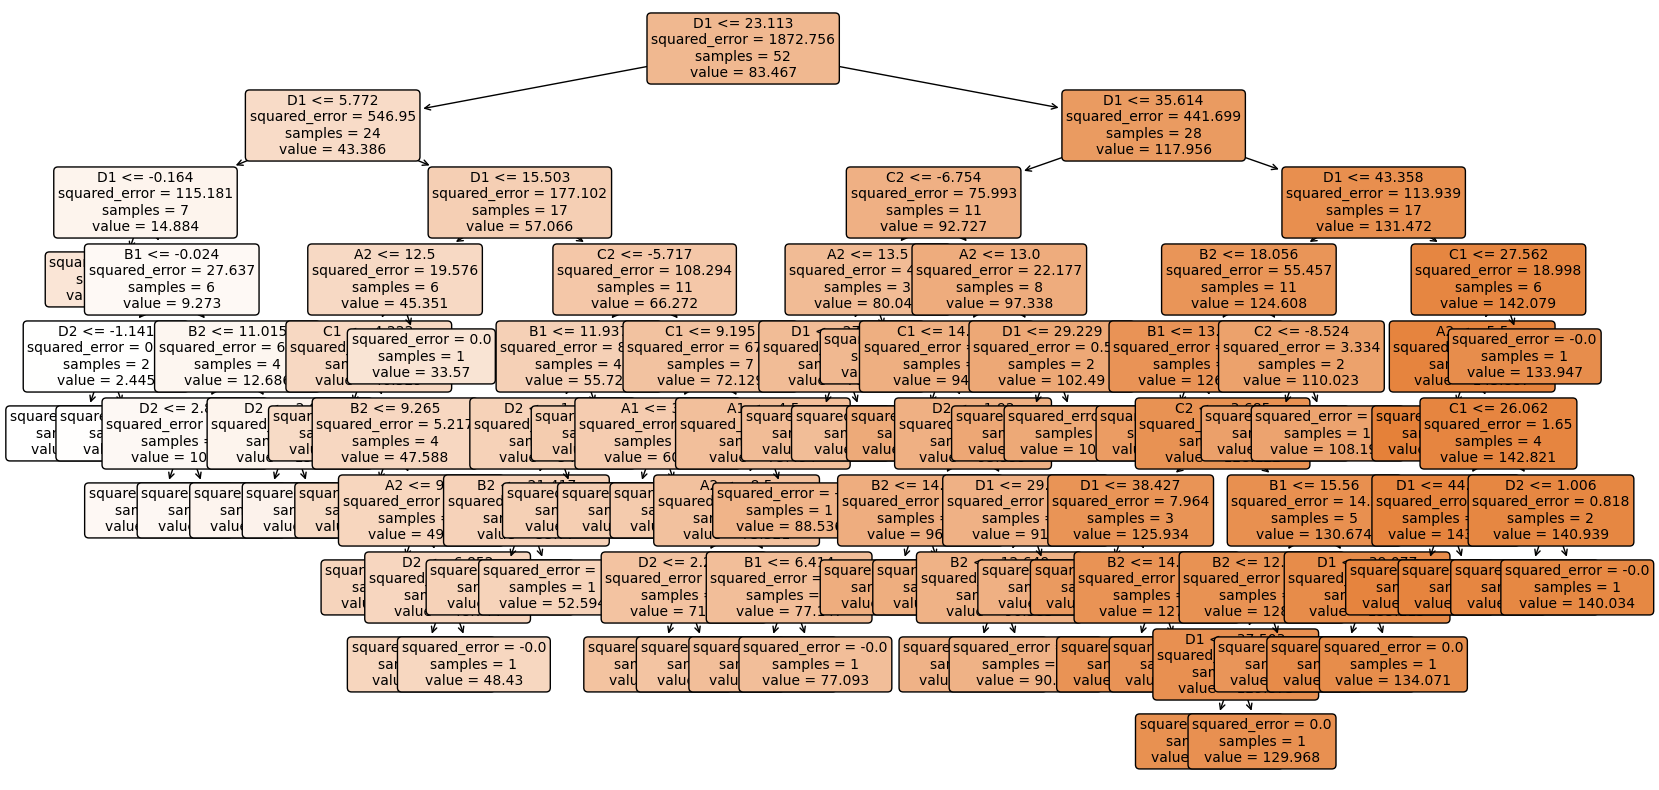

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 选择 Random Forest 中的第一棵树
tree_to_plot = model.estimators_[0]

# 绘制树状图
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()
